<a href="https://colab.research.google.com/github/MNagaHarshithRao/Environment-Impact-Assessment/blob/main/Environment_impact_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Used for data Manipulation
import pandas as pd

# Used for numerical data
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing values
from sklearn.impute import KNNImputer

#Scale the data
from sklearn.preprocessing import StandardScaler

# Sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# To Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the Dataset and displaying the first 5 rows
env_data = pd.read_csv("environmental_data.csv")
env_data.head()

,Date,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
0,2020-01-01,24.967142,81.163986,15.746817,59.012261,554.365370
1,2020-01-02,18.617357,58.521178,16.820701,51.655458,10.154111
2,2020-01-03,26.476885,NaN,15.035892,50.735657,42.572468
3,2020-01-04,35.230299,70.623216,4.567612,2.313864,1000.000000
4,2020-01-05,17.658466,63.498242,NaN,64.903017,240.464324


###Exploratory Data Analysis (EDA)

In [ ]:
#Information about the Data(Data tpes, count, null values, etc)
env_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1827 non-null   object 
 1   Temperature (°C)         1736 non-null   float64
 2   Humidity (%)             1736 non-null   float64
 3   Wind Speed (km/h)        1736 non-null   float64
 4   Air Quality Index (AQI)  1736 non-null   float64
 5   Impact Score             1736 non-null   float64
dtypes: float64(5), object(1)
memory usage: 85.8+ KB


###we see that the column name date is the type object, we need to convert it into 'DateTime'


In [ ]:
#Summary of the statistics
env_data.describe()

,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
count,1736.000000,1736.000000,1736.000000,1736.000000,1736.000000
mean,20.467684,60.092302,14.838102,49.340175,592.238342
std,9.844601,15.010078,4.912021,20.682334,334.617516
min,-12.412673,14.707318,0.000000,0.000000,10.154111
25%,13.771902,49.875074,11.606050,35.180717,290.143916
50%,20.460042,60.014162,14.900830,49.142549,563.582840
75%,26.755834,70.207529,18.075249,63.773448,1000.000000
max,50.000000,100.000000,31.215465,120.581104,1000.000000


###The values vary from each column to column so Feature Scaling is necessary

In [ ]:
#Checking for missing values
missing_values = env_data.isnull().sum()
missing_values

,0
Date,0
Temperature (°C),91
Humidity (%),91
Wind Speed (km/h),91
Air Quality Index (AQI),91
Impact Score,91


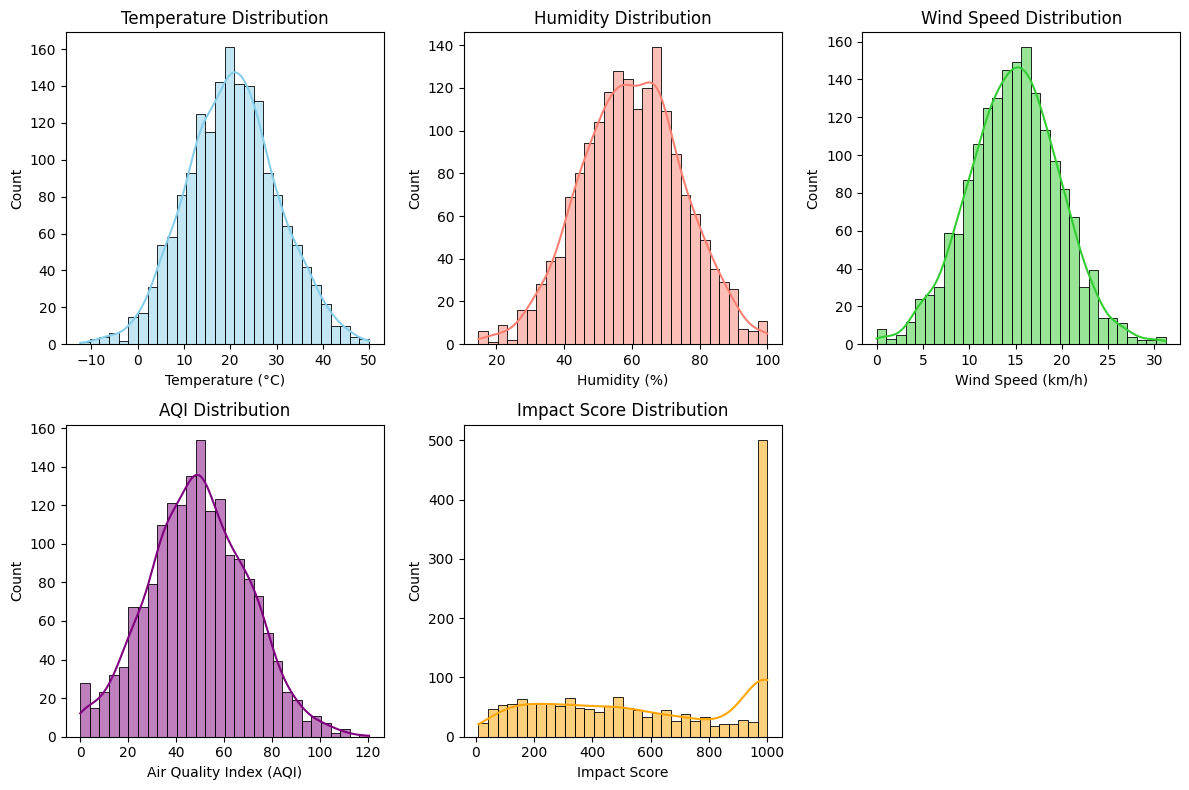

In [ ]:
# Histplot for every feature
plt.figure(figsize=(12, 8))

# Plot distributions
plt.subplot(2, 3, 1)
sns.histplot(env_data['Temperature (°C)'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(2, 3, 2)
sns.histplot(env_data['Humidity (%)'].dropna(), kde=True, bins=30, color='salmon')
plt.title('Humidity Distribution')

plt.subplot(2, 3, 3)
sns.histplot(env_data['Wind Speed (km/h)'].dropna(), kde=True, bins=30, color='limegreen')
plt.title('Wind Speed Distribution')

plt.subplot(2, 3, 4)
sns.histplot(env_data['Air Quality Index (AQI)'].dropna(), kde=True, bins=30, color='purple')
plt.title('AQI Distribution')

plt.subplot(2, 3, 5)
sns.histplot(env_data['Impact Score'].dropna(), kde=True, bins=30, color='orange')
plt.title('Impact Score Distribution')

plt.tight_layout()
plt.show()


### We notice that the data for Temprature, Humidity, Wind Speed and Air Quality Index follow a normal distribution while the Impact Score does not

### Data may have some outliers

In [ ]:
# Calculate the correlation matrix between features and target
correlation_matrix = env_data.drop('Date', axis=1).corr()
correlation_matrix

,Temperature (°C),Humidity (%),Wind Speed (km/h),Air Quality Index (AQI),Impact Score
Temperature (°C),1.000000,-0.017579,0.065700,0.026487,0.008257
Humidity (%),-0.017579,1.000000,0.034697,0.001608,-0.020951
Wind Speed (km/h),0.065700,0.034697,1.000000,0.031236,-0.018427
Air Quality Index (AQI),0.026487,0.001608,0.031236,1.000000,-0.018029
Impact Score,0.008257,-0.020951,-0.018427,-0.018029,1.000000


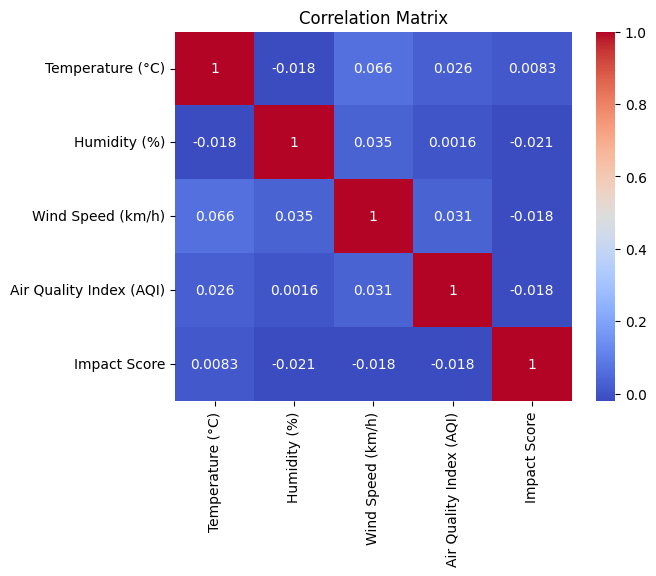

In [ ]:
#Plotting correlation matrix
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix')
plt.show()

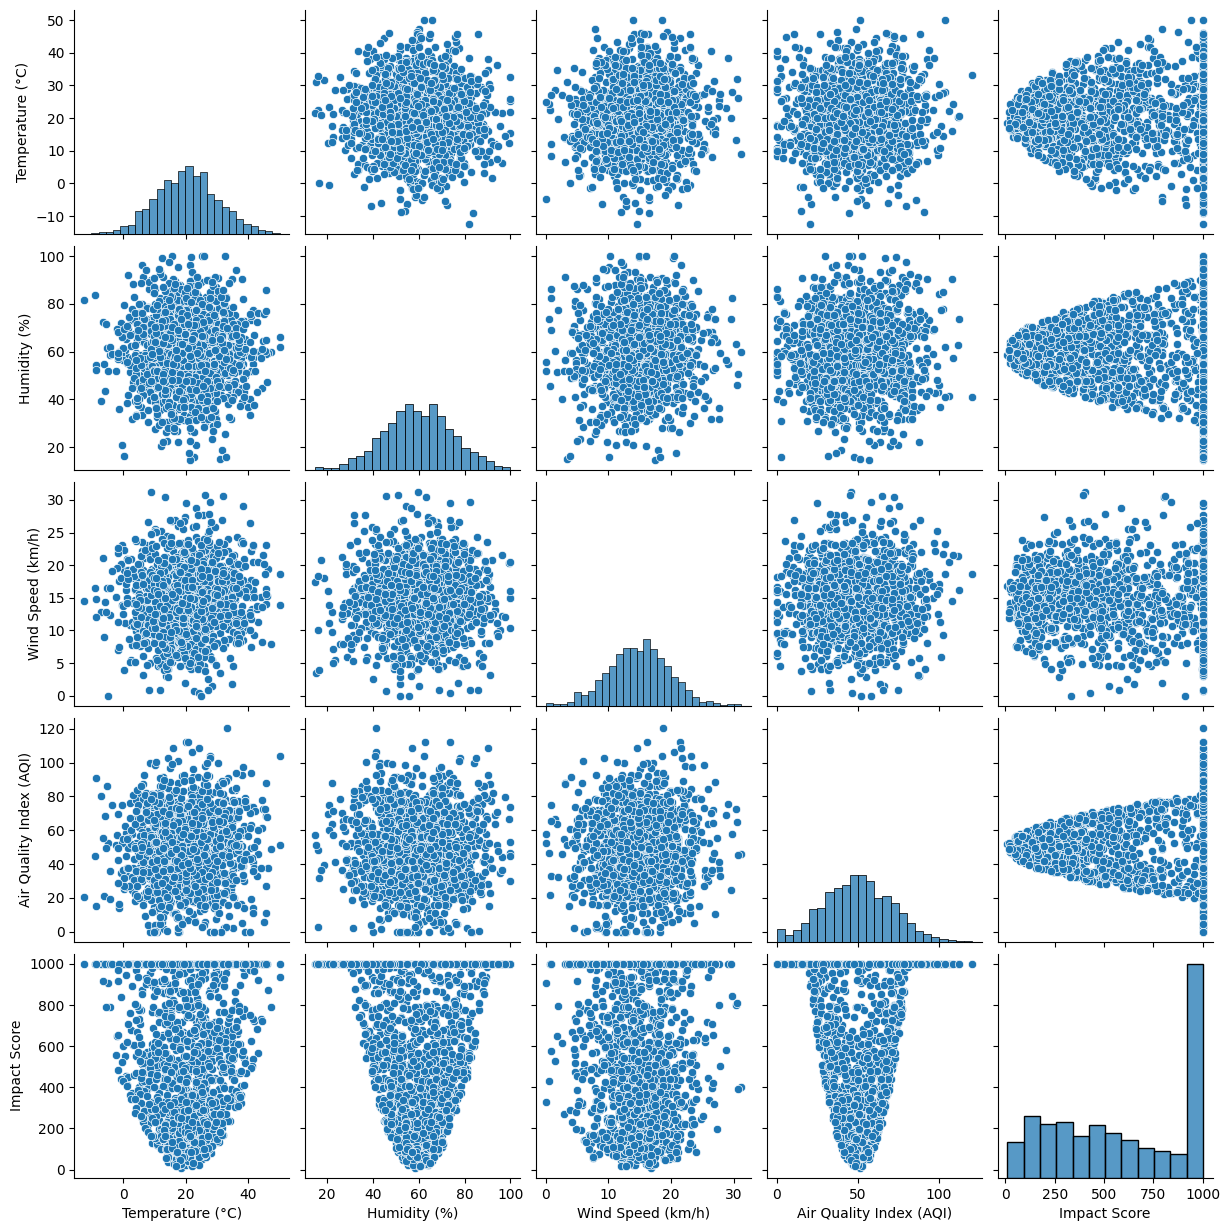

In [ ]:
# Relationships between features and impact scores
sns.pairplot(env_data.dropna(), vars=['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score'])
plt.show()

> ### `Temperature` has a `positive` correlation with `Impact Score`, `Humidity` has a very `small negative` correlation with `Impact Score`, `Wind Speed` shows a very `weak negative` correlation with `Impact Score` and `Air Quality Index` has a `negative` correlation with `Impact Score`

In [ ]:
env_data['Month'] = pd.to_datetime(env_data['Date']).dt.month

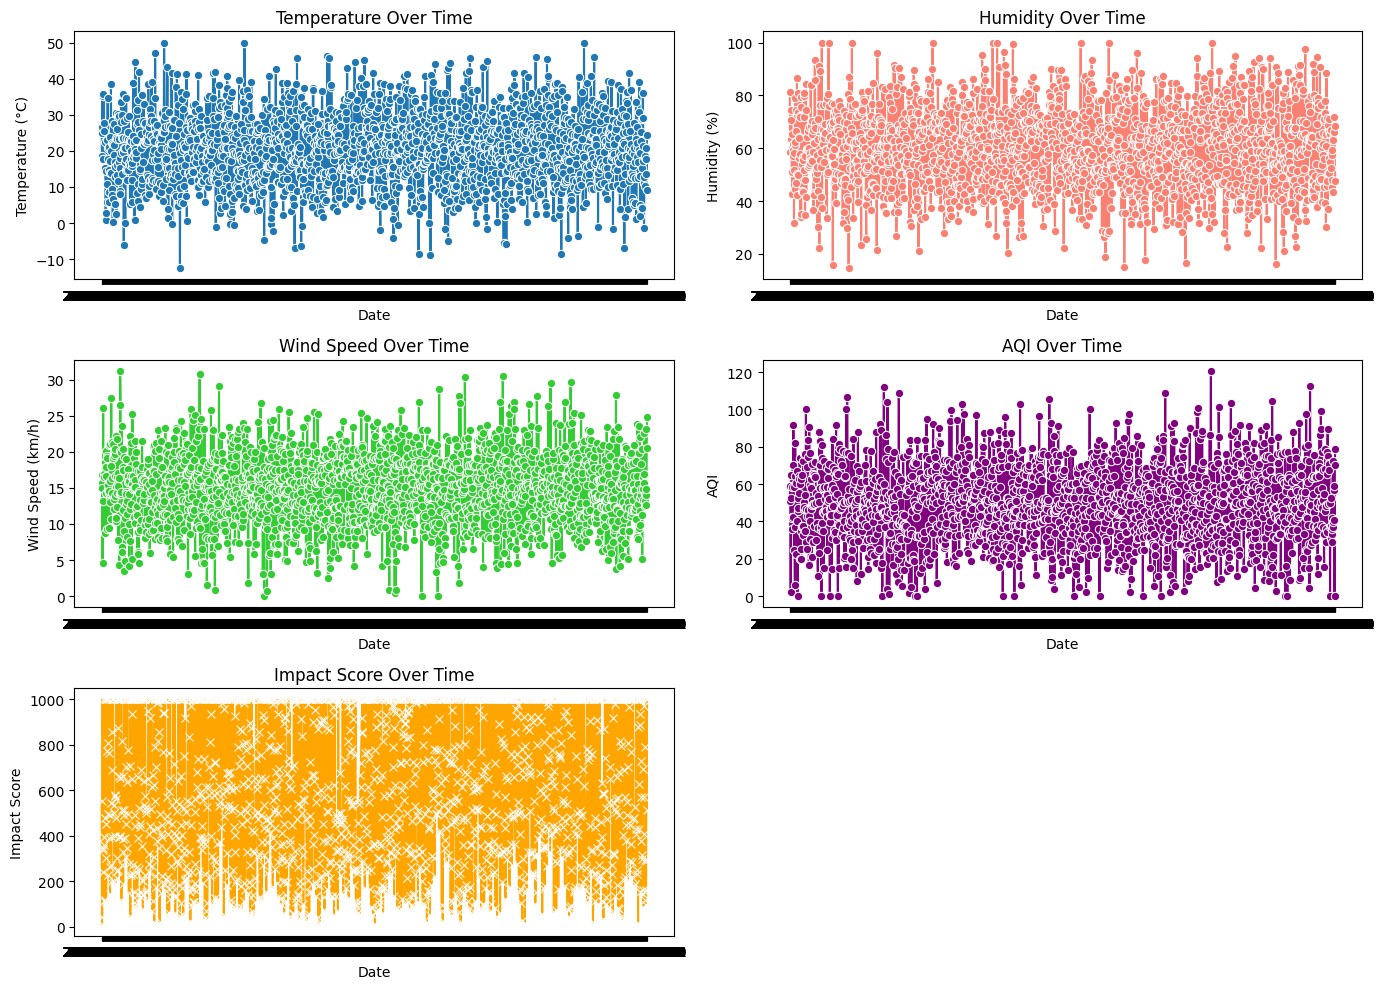

In [ ]:
# Time series plots
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.lineplot(x='Date', y='Temperature (°C)', data=env_data, marker='o')
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.lineplot(x='Date', y='Humidity (%)', data=env_data, marker='o', color='salmon')
plt.title('Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.lineplot(x='Date', y='Wind Speed (km/h)', data=env_data, marker='o', color='limegreen')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.lineplot(x='Date', y='Air Quality Index (AQI)', data=env_data, marker='o', color='purple')
plt.title('AQI Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.lineplot(x='Date', y='Impact Score', data=env_data, marker='x', color='orange')
plt.title('Impact Score Over Time')
plt.xlabel('Date')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()

### Plot shows relatively `constant temperature` `~10°C variation`, `humidity` `~20% variation`, and high `impact score` throughout `4 years`. `Wind speed` is most variable `up to 30 km/h gusts`

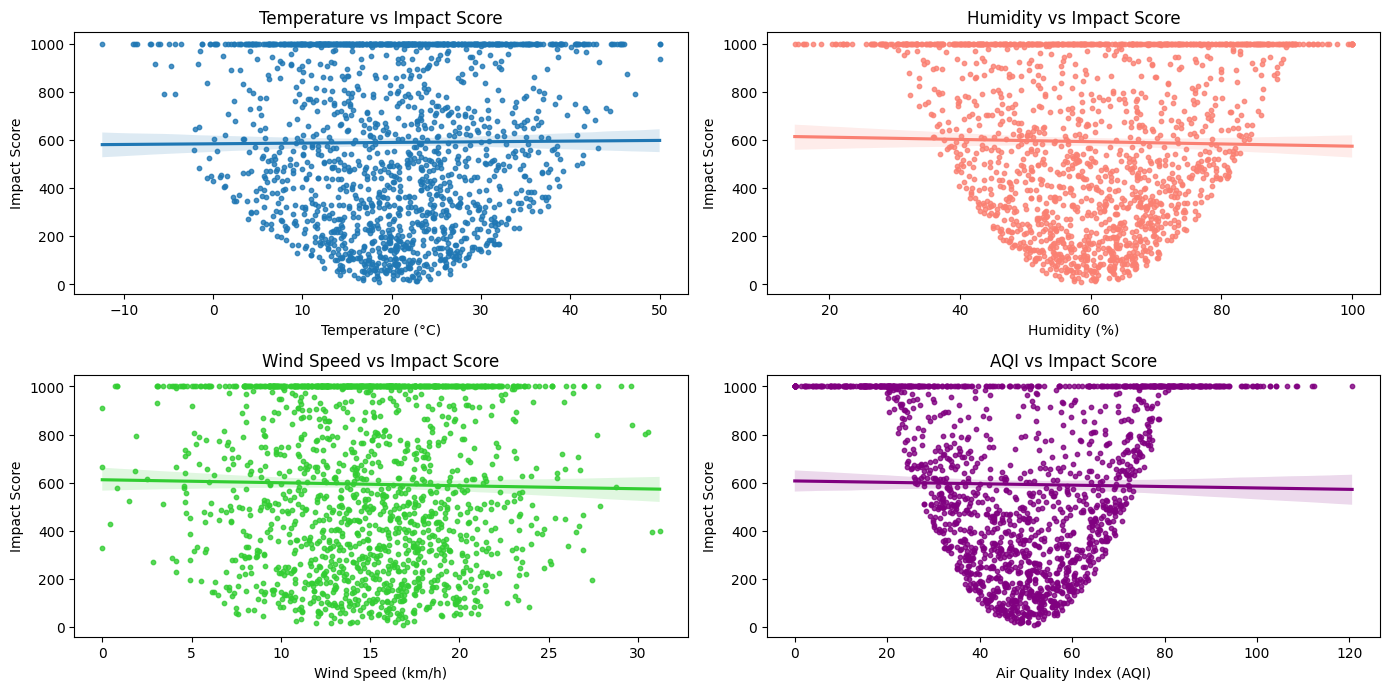

In [ ]:
# Scatter plots with regression lines for each parameter against impact score
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.regplot(x='Temperature (°C)', y='Impact Score', data=env_data, scatter_kws={'s':10})
plt.title('Temperature vs Impact Score')
plt.xlabel('Temperature (°C)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 2)
sns.regplot(x='Humidity (%)', y='Impact Score', data=env_data, scatter_kws={'s':10}, color='salmon')
plt.title('Humidity vs Impact Score')
plt.xlabel('Humidity (%)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 3)
sns.regplot(x='Wind Speed (km/h)', y='Impact Score', data=env_data, scatter_kws={'s':10}, color='limegreen')
plt.title('Wind Speed vs Impact Score')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Impact Score')

plt.subplot(3, 2, 4)
sns.regplot(x='Air Quality Index (AQI)', y='Impact Score', data=env_data, scatter_kws={'s':10}, color='purple')
plt.title('AQI vs Impact Score')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()

### Plot shows weak correlations between temperature/humidity, wind/air quality.

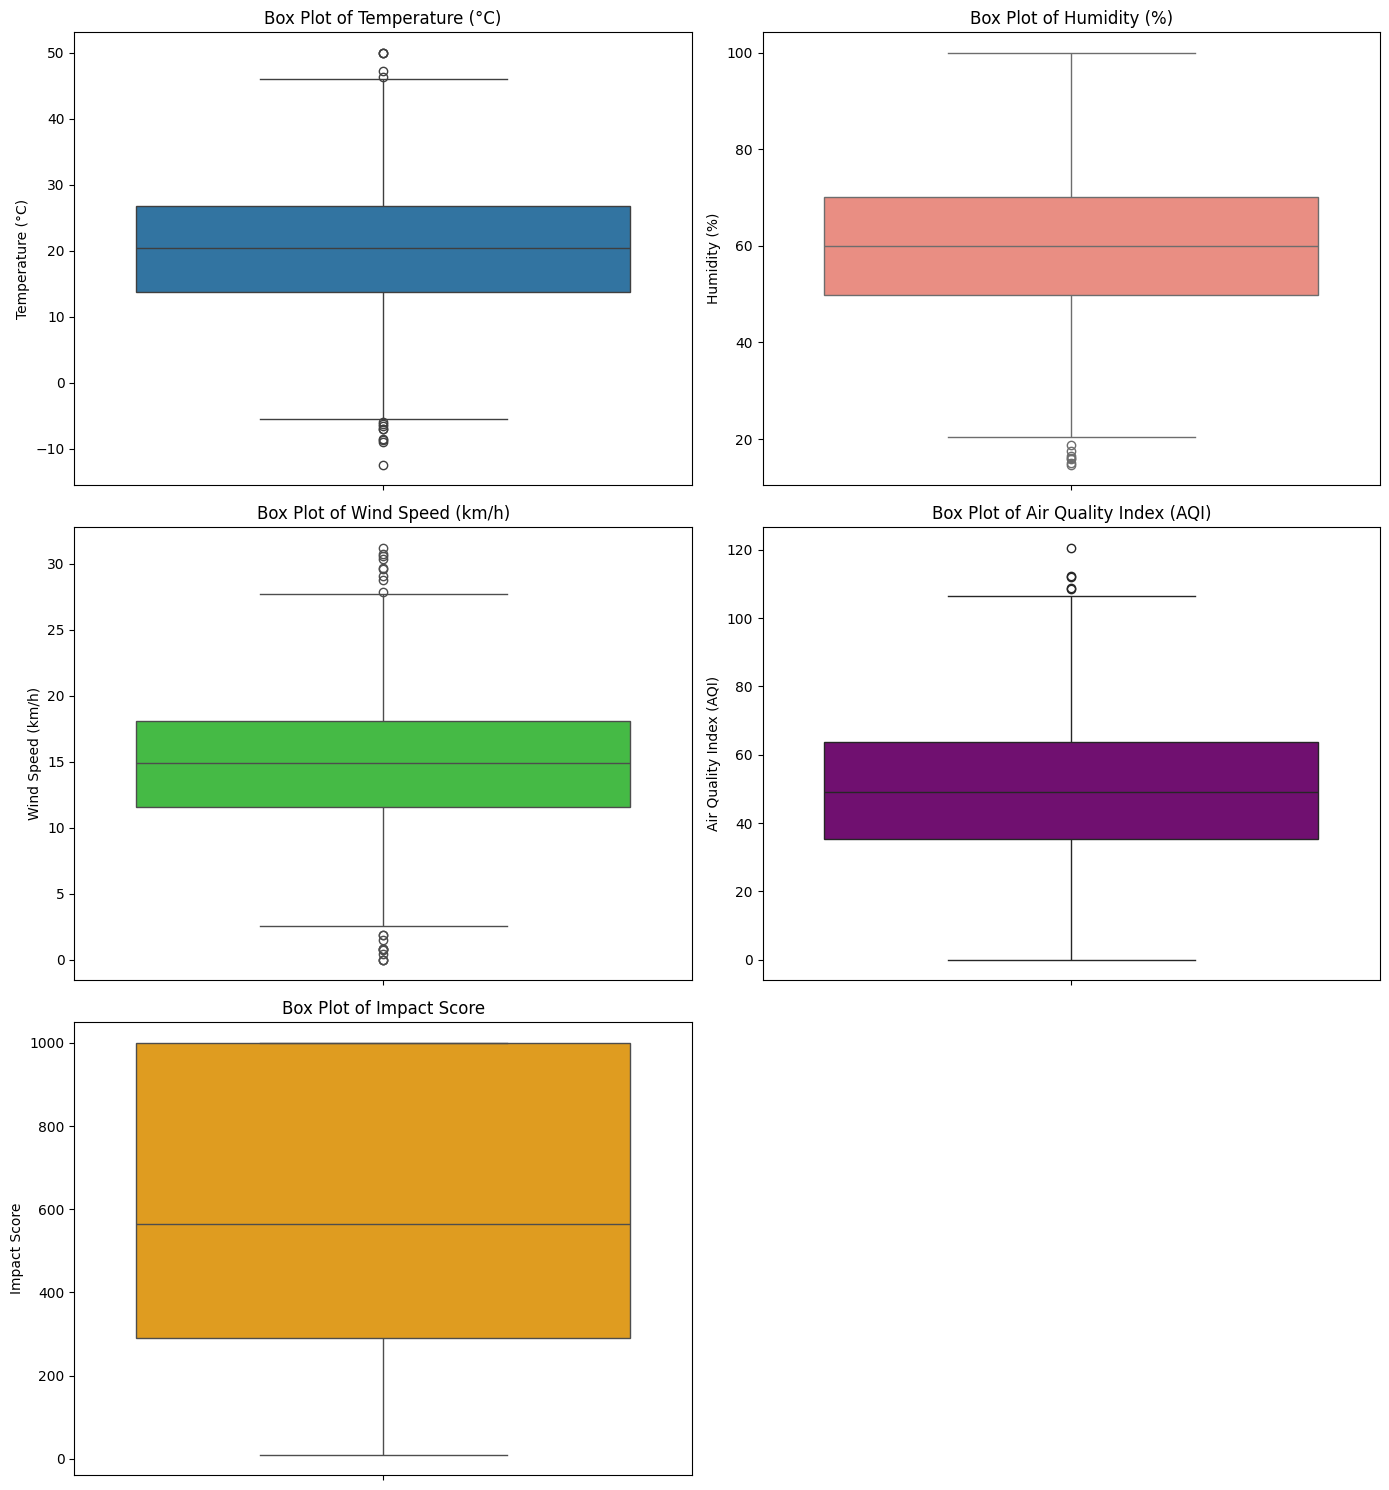

In [ ]:
# Box plots for each Fearture to show outliers
plt.figure(figsize=(14, 15))

plt.subplot(3, 2, 1)
sns.boxplot(y='Temperature (°C)', data=env_data)
plt.title('Box Plot of Temperature (°C)')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.boxplot(y='Humidity (%)', data=env_data, color='salmon')
plt.title('Box Plot of Humidity (%)')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.boxplot(y='Wind Speed (km/h)', data=env_data, color='limegreen')
plt.title('Box Plot of Wind Speed (km/h)')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.boxplot(y='Air Quality Index (AQI)', data=env_data, color='purple')
plt.title('Box Plot of Air Quality Index (AQI)')
plt.ylabel('Air Quality Index (AQI)')

plt.subplot(3, 2, 5)
sns.boxplot(y='Impact Score', data=env_data, color='orange')
plt.title('Box Plot of Impact Score')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()


### Box plots reveal median values and data distribution for `temperature`, `humidity`, `wind speed`, `AQI`, and `impact score`. `AQI` shows variation

#### Cast `Date` Column To `DateTime` Type and Generate `Month` Column

In [ ]:
# Parse 'Date' as datetime and extract the month
env_data['Date'] = pd.to_datetime(env_data['Date'])

In [ ]:
# Generate a `Month` Column to understand data more
env_data['Month'] = env_data['Date'].dt.month

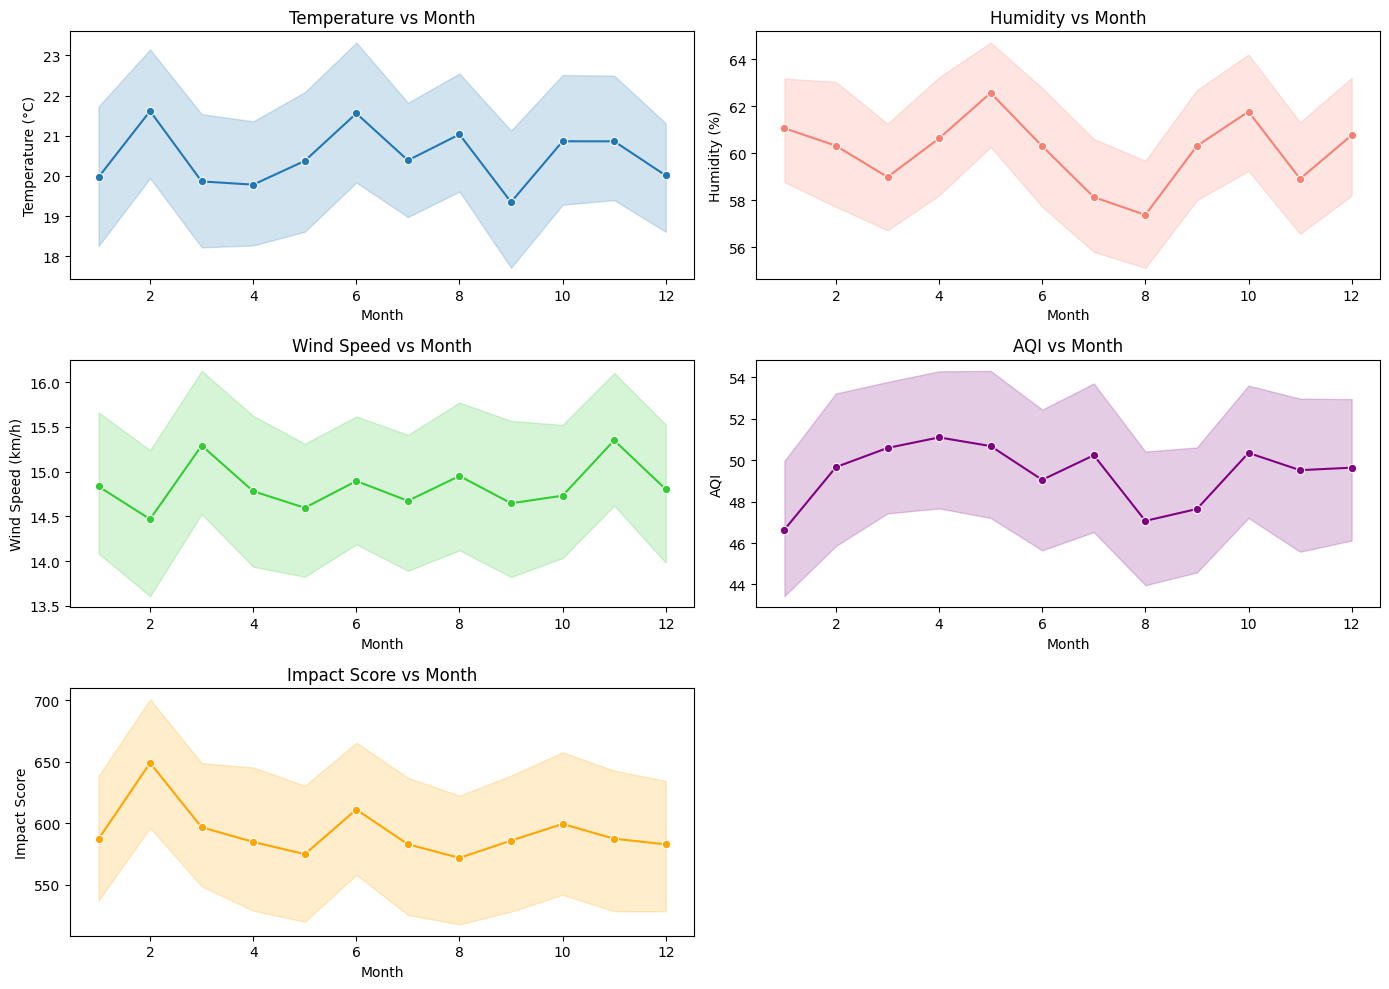

In [ ]:
# Plot each feature against the month
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.lineplot(x='Month', y='Temperature (°C)', data=env_data, marker='o')
plt.title('Temperature vs Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.lineplot(x='Month', y='Humidity (%)', data=env_data, marker='o', color='salmon')
plt.title('Humidity vs Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.lineplot(x='Month', y='Wind Speed (km/h)', data=env_data, marker='o', color='limegreen')
plt.title('Wind Speed vs Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.lineplot(x='Month', y='Air Quality Index (AQI)', data=env_data, marker='o', color='purple')
plt.title('AQI vs Month')
plt.xlabel('Month')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.lineplot(x='Month', y='Impact Score', data=env_data, marker='o', color='orange')
plt.title('Impact Score vs Month')
plt.xlabel('Month')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()

### `Temperature` and `humidity` are highest in summer, lowest in winter. `Wind speed` is fairly constant. `AQI` is highest in winter, lowest in summer

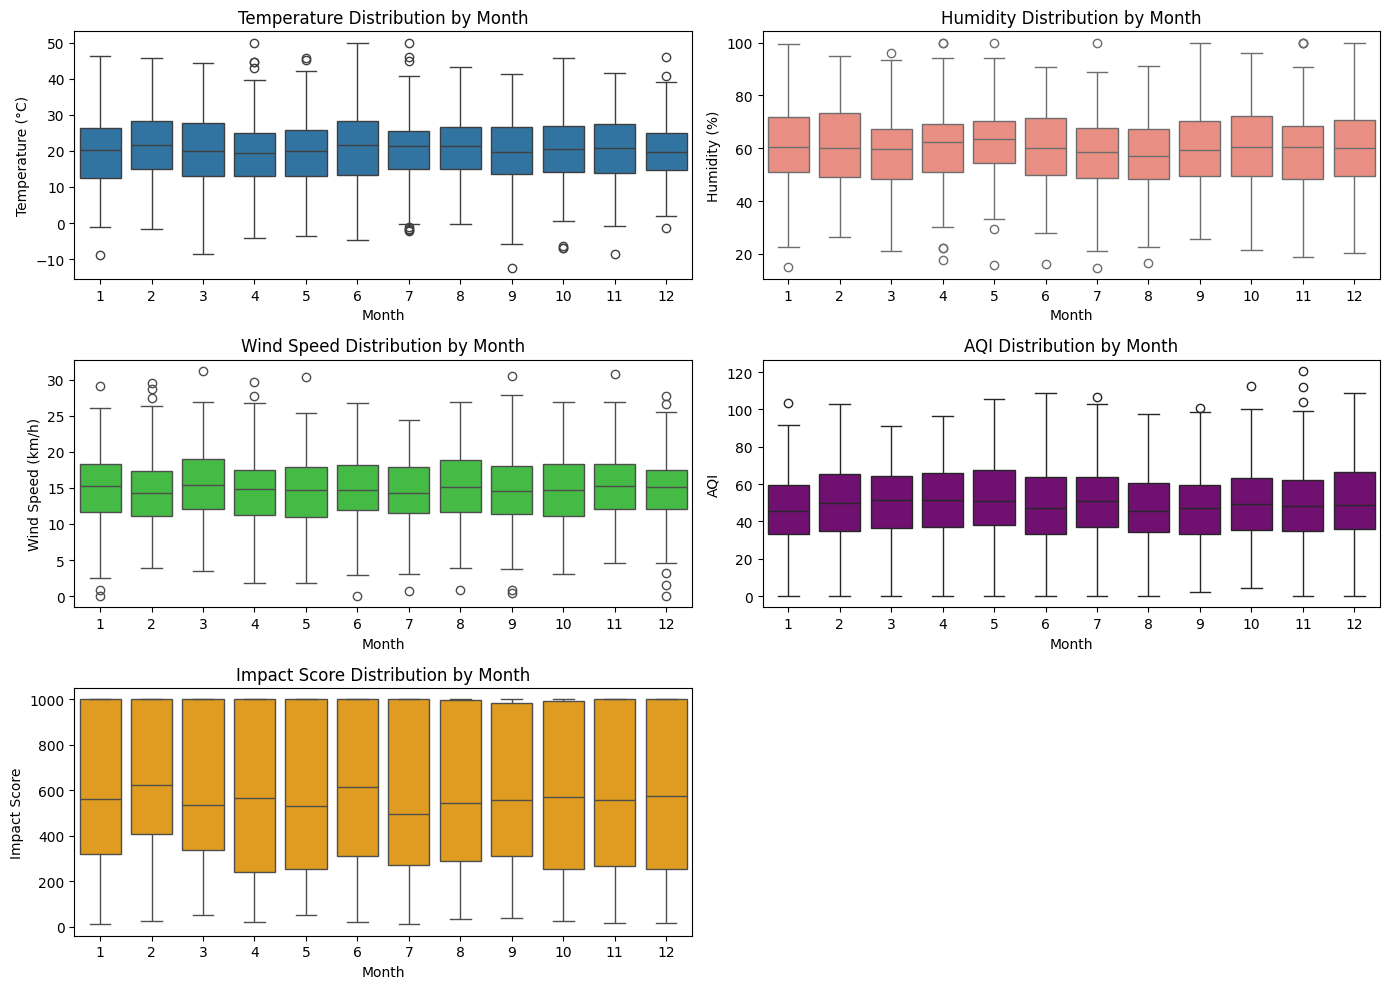

In [ ]:
# Box plots for each Feature by month
plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
sns.boxplot(x='Month', y='Temperature (°C)', data=env_data)
plt.title('Temperature Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.subplot(3, 2, 2)
sns.boxplot(x='Month', y='Humidity (%)', data=env_data, color='salmon')
plt.title('Humidity Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Humidity (%)')

plt.subplot(3, 2, 3)
sns.boxplot(x='Month', y='Wind Speed (km/h)', data=env_data, color='limegreen')
plt.title('Wind Speed Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')

plt.subplot(3, 2, 4)
sns.boxplot(x='Month', y='Air Quality Index (AQI)', data=env_data, color='purple')
plt.title('AQI Distribution by Month')
plt.xlabel('Month')
plt.ylabel('AQI')

plt.subplot(3, 2, 5)
sns.boxplot(x='Month', y='Impact Score', data=env_data, color='orange')
plt.title('Impact Score Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Impact Score')

plt.tight_layout()
plt.show()


> ### Patterns in `temperature` (high summer, low winter), `humidity` (high summer, low winter),`air quality` (low summer, high winter)

# PreProcessing Data
# Handling Missing vlayes

In [ ]:
# copy of the original data
environmental_data_imputed = env_data.copy()

In [ ]:
# Initialize the KNN Imputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Do KNN Imputation on the selected columns
environmental_data_imputed[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']] = knn_imputer.fit_transform(
    env_data[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']]
)

In [ ]:
# Check Nulls
environmental_data_imputed.isnull().sum()

,0
Date,0
Temperature (°C),0
Humidity (%),0
Wind Speed (km/h),0
Air Quality Index (AQI),0
Impact Score,0
Month,0


# Data Scaling

In [ ]:
environmental_data_scaled = environmental_data_imputed.copy()

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Scaling Numerical Features Using Z-normalization (Standardization)
environmental_data_scaled[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']] = scaler.fit_transform(
    environmental_data_imputed[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']]
)

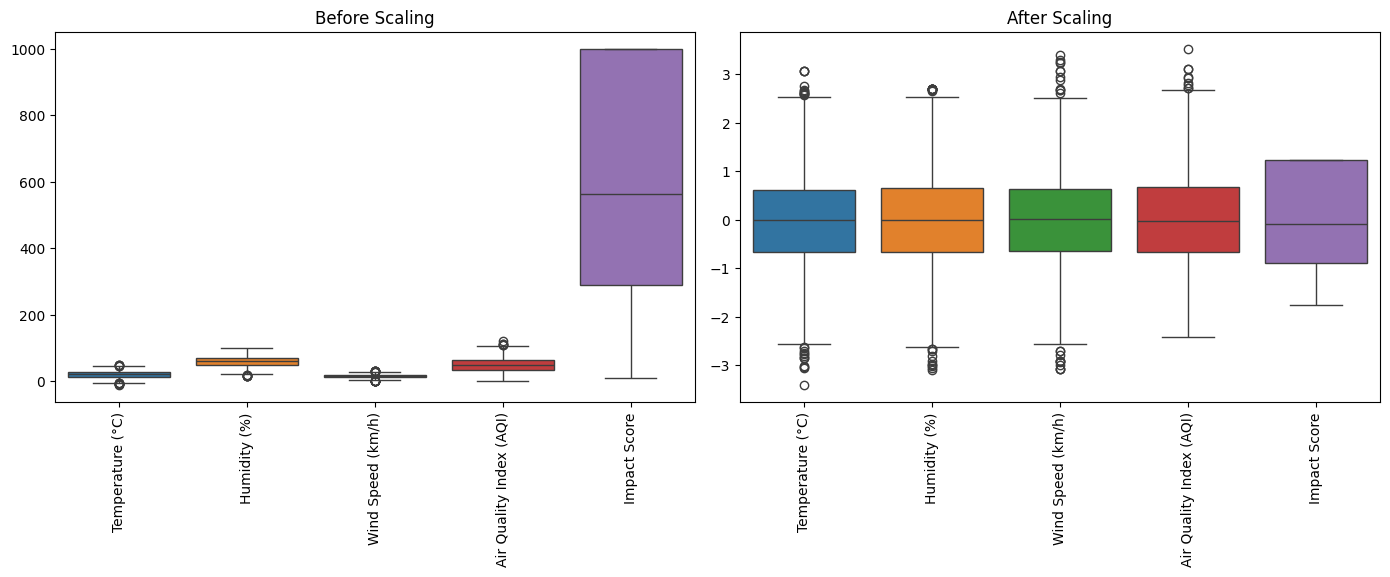

In [ ]:
# Visualize scaling effects
plt.figure(figsize=(14, 15))
plt.subplot(3, 2, 3)
sns.boxplot(data=env_data[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']])
plt.title('Before Scaling')
plt.xticks(rotation=90)

plt.subplot(3, 2, 4)
sns.boxplot(data=environmental_data_scaled[['Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Air Quality Index (AQI)', 'Impact Score']])
plt.title('After Scaling')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#Split the data

In [ ]:
# Split the data into features and target
X = environmental_data_scaled.drop(columns=['Impact Score', 'Date'])
y = environmental_data_scaled['Impact Score']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1461, 5), (366, 5), (1461,), (366,))

#Devloped a predictive model

In [ ]:
# Evaluate model performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return mae, rmse, y_test, y_pred

In [ ]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision tree' : DecisionTreeRegressor(random_state=42)
}

In [ ]:
# Evaluate models
results = {}
predictions = {}
for model_name, model in models.items():
    mae, rmse, y_test, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {'MAE': mae, 'RMSE': rmse}
    predictions[model_name] = {'y_test': y_test, 'y_pred': y_pred}

In [ ]:
# Print the results
results_df = pd.DataFrame(results).T
results_df

,MAE,RMSE
Linear Regression,0.916684,1.025782
Random Forest,0.197109,0.345286
Gradient Boosting,0.224519,0.346848
Decision tree,0.273082,0.482907


> ### `Random Forest` has the lowest MAE (0.197109) so it makes the smallest average error in predictions
> ### `Gradient Boosting` has the lowest RMSE (0.346848) so it has the smallest average squared error in predictions.
> ### `Decision Tree` has the Third lowest MAE (0.273082) so it makes the smallest average error in predictions


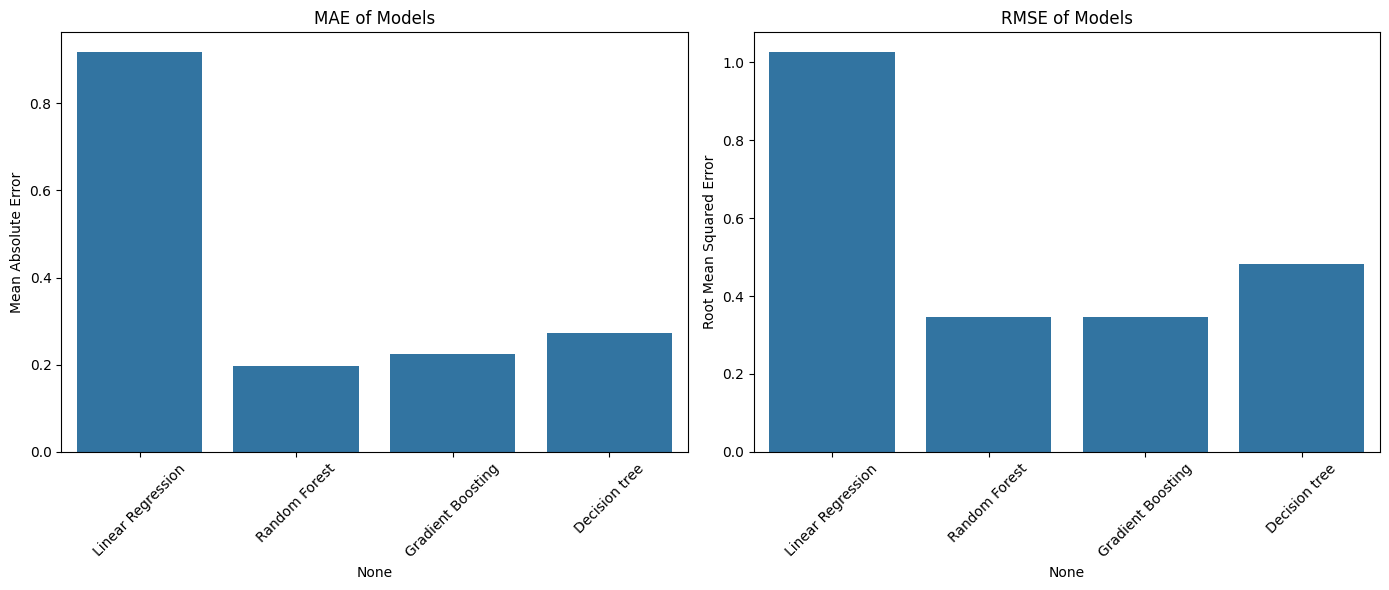

In [ ]:
# Plot MAE and RMSE for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=results_df.index, y=results_df['MAE'])
plt.title('MAE of Models')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title('RMSE of Models')
plt.ylabel('Root Mean Squared Error')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Cross-Validation for more reliable performance estimates
cv_results = {}
for model_name, model in models.items():
    mae_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=5)
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))

    cv_results[model_name] = {
        'CV MAE Mean': -mae_scores.mean(),
        'CV MAE Std': mae_scores.std(),
        'CV RMSE Mean': rmse_scores.mean(),
        'CV RMSE Std': rmse_scores.std()
    }

In [ ]:
# Display cross-validation results
cv_results_df = pd.DataFrame(cv_results).T
cv_results_df

,CV MAE Mean,CV MAE Std,CV RMSE Mean,CV RMSE Std
Linear Regression,0.892567,0.017739,1.002472,0.011576
Random Forest,0.218644,0.013186,0.369767,0.030631
Gradient Boosting,0.247482,0.012037,0.369193,0.032345
Decision tree,0.300270,0.017101,0.527552,0.025750


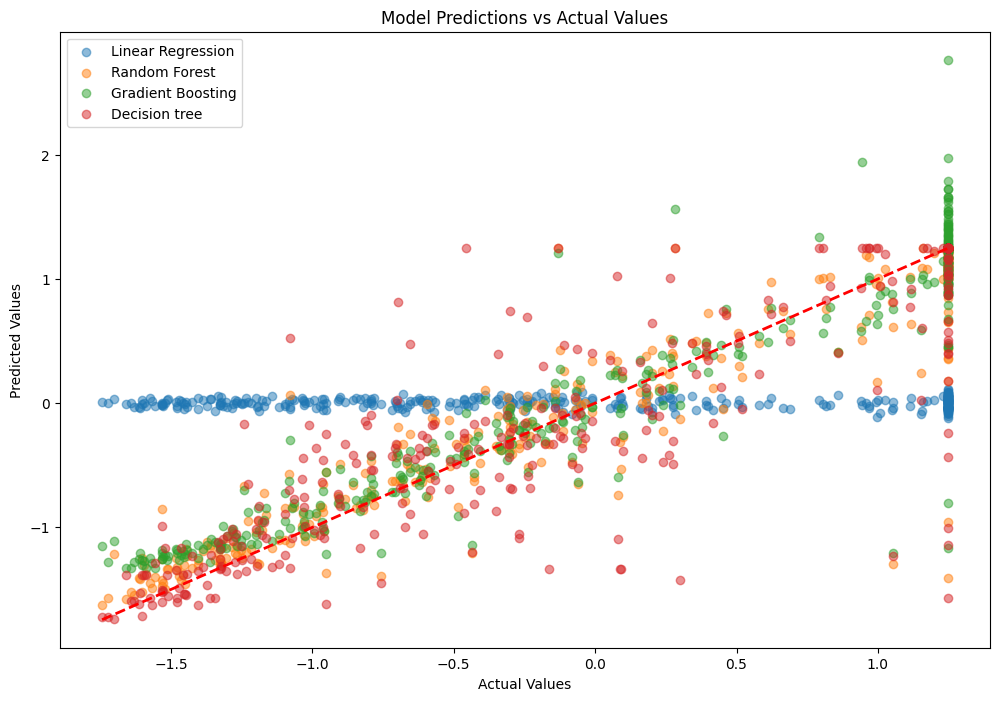

In [ ]:
# Model (Prediction VS Actual values) plot
plt.figure(figsize=(12, 8))

for model_name, preds in predictions.items():
    plt.scatter(preds['y_test'], preds['y_pred'], alpha=0.5, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Predictions vs Actual Values')
plt.legend()
plt.show()

> ### The Best Model That Give Minimum RMSR Is `Gradient Boosting`

In [ ]:
# Get Feature Importances
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_importances = gb_model.feature_importances_

In [ ]:
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Gradient Boosting Importance': gb_importances
}).set_index('Feature')

## Show  Feature Importances
importance_df

,Gradient Boosting Importance
Feature,
Temperature (°C),0.068219
Humidity (%),0.315404
Wind Speed (km/h),0.015923
Air Quality Index (AQI),0.598790
Month,0.001664


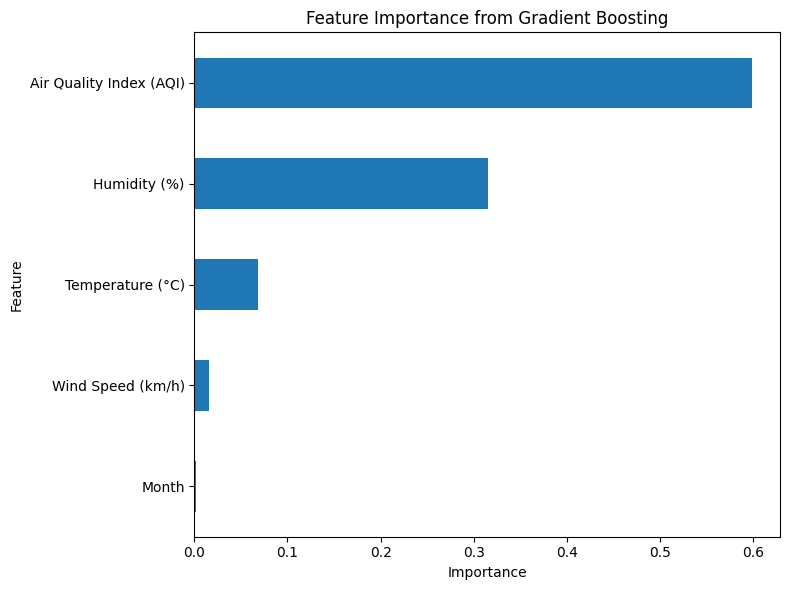

In [ ]:
# Plot the feature importances
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
importance_df['Gradient Boosting Importance'].sort_values().plot(kind='barh')
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance')

plt.tight_layout()
plt.show()

> ### The Most Important Feature For `Gradient Boosting` Is `Air Quality Index (AQI)`


# Hyperparameter Tuning For `GradientBoostingRegressor`

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Initialize the GridSearchCV with GradientBoostingRegressor
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
print(f"Best parameters found: {best_params}")

Best parameters found: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


> ### `Best parameters found`: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}

In [ ]:
print(f"Best Model found: {best_model}")

Best Model found: GradientBoostingRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                          random_state=42)


In [ ]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
print(f"MAE of the best model: {mae}")
print(f"RMSE of the best model: {rmse}")

MAE of the best model: 0.19702418288108656
RMSE of the best model: 0.3246039807465729


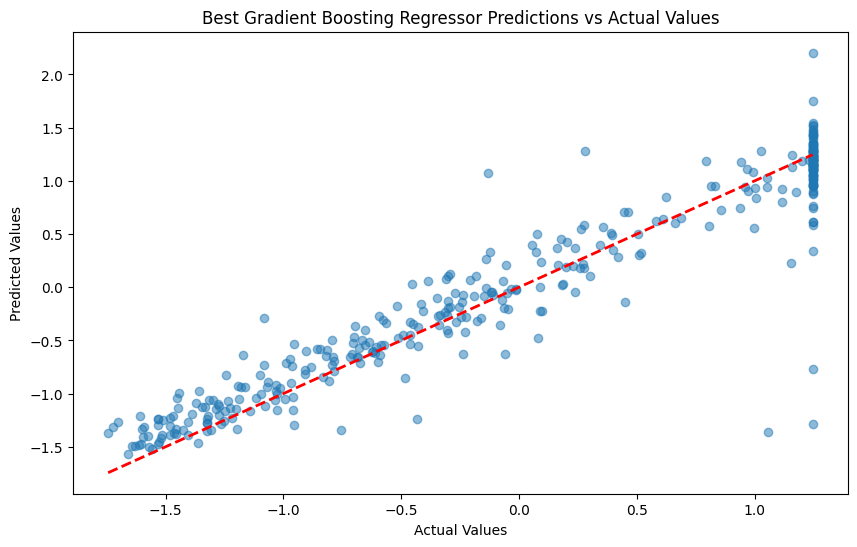

In [ ]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Best Gradient Boosting Regressor Predictions vs Actual Values')
plt.show()

> ### The Best Parameters that Make the `Gradient Boosting Regressor` Go Down Is
> ### `GradientBoostingRegressor`(min_samples_leaf=4, min_samples_split=10, random_state=42)